In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#Market Basket Analysis

In [5]:
import pandas as pd

# Selected categorical columns to treat as "items"
cols_for_mba = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']

def create_transaction(row):
    items = []
    for col in cols_for_mba:
        items.append(f"{col}_{row[col]}")
    return items

transactions = df.apply(create_transaction, axis=1).tolist()

# first 3 transactions preview
print(transactions[:3])


[['job_housemaid', 'marital_married', 'education_basic.4y', 'default_no', 'housing_no', 'loan_no', 'contact_telephone', 'poutcome_nonexistent', 'y_no'], ['job_services', 'marital_married', 'education_high.school', 'default_unknown', 'housing_no', 'loan_no', 'contact_telephone', 'poutcome_nonexistent', 'y_no'], ['job_services', 'marital_married', 'education_high.school', 'default_no', 'housing_yes', 'loan_no', 'contact_telephone', 'poutcome_nonexistent', 'y_no']]


In [6]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

print(df_trans.head())


   contact_cellular  contact_telephone  default_no  default_unknown  \
0             False               True        True            False   
1             False               True       False             True   
2             False               True        True            False   
3             False               True        True            False   
4             False               True        True            False   

   default_yes  education_basic.4y  education_basic.6y  education_basic.9y  \
0        False                True               False               False   
1        False               False               False               False   
2        False               False               False               False   
3        False               False                True               False   
4        False               False               False               False   

   education_high.school  education_illiterate  ...  loan_yes  \
0                  False               

In [7]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_trans, min_support=0.05, use_colnames=True)
print(frequent_itemsets.sort_values(by='support', ascending=False).head(10))


      support                            itemsets
24   0.887346                              (y_no)
23   0.863431              (poutcome_nonexistent)
17   0.824269                           (loan_no)
2    0.791201                        (default_no)
194  0.787171        (poutcome_nonexistent, y_no)
180  0.730795                     (y_no, loan_no)
179  0.711761     (poutcome_nonexistent, loan_no)
83   0.689303                  (default_no, y_no)
82   0.668617  (poutcome_nonexistent, default_no)
76   0.651865               (default_no, loan_no)


In [8]:
from mlxtend.frequent_patterns import association_rules

# Generate rules with confidence >= 0.7
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Sort by lift to get strongest rules
rules = rules.sort_values(by='lift', ascending=False)

# Display top 10 rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

                                        antecedents  \
51                                 (job_management)   
119                              (poutcome_failure)   
813                     (poutcome_failure, loan_no)   
848                        (poutcome_failure, y_no)   
2408              (poutcome_failure, y_no, loan_no)   
193                              (poutcome_failure)   
186             (marital_married, poutcome_failure)   
1034                    (poutcome_failure, loan_no)   
3950  (contact_telephone, default_unknown, loan_no)   
3                                (poutcome_failure)   

                                        consequents   support  confidence  \
51                    (education_university.degree)  0.050087    0.705540   
119                  (contact_cellular, default_no)  0.084151    0.815146   
813                  (contact_cellular, default_no)  0.068855    0.811213   
848                  (contact_cellular, default_no)  0.071016    0.802029   
2408     

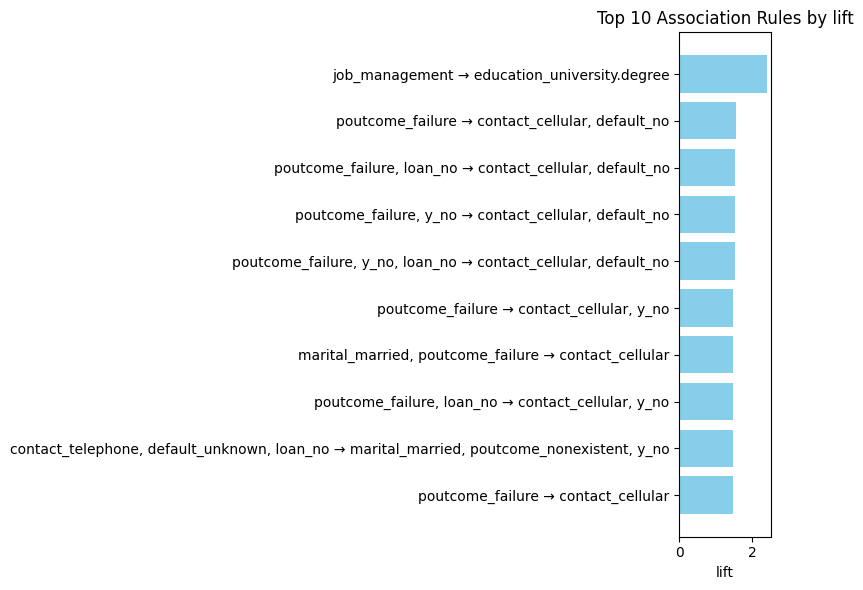

In [18]:
import matplotlib.pyplot as plt
top_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)
# Prepare labels
top_rules['rule'] = top_rules.apply(
    lambda row: f"{', '.join(list(row['antecedents']))} → {', '.join(list(row['consequents']))}",
    axis=1
)

# Sort by lift
top_rules = top_rules.sort_values(by='lift', ascending=True)

# Plot
plt.figure(figsize=(8,6))
plt.barh(top_rules['rule'], top_rules['lift'], color='skyblue')
plt.xlabel('lift')
plt.title('Top 10 Association Rules by lift')
plt.tight_layout()
plt.savefig("mba_bar.png", dpi=300, bbox_inches='tight')
plt.show()



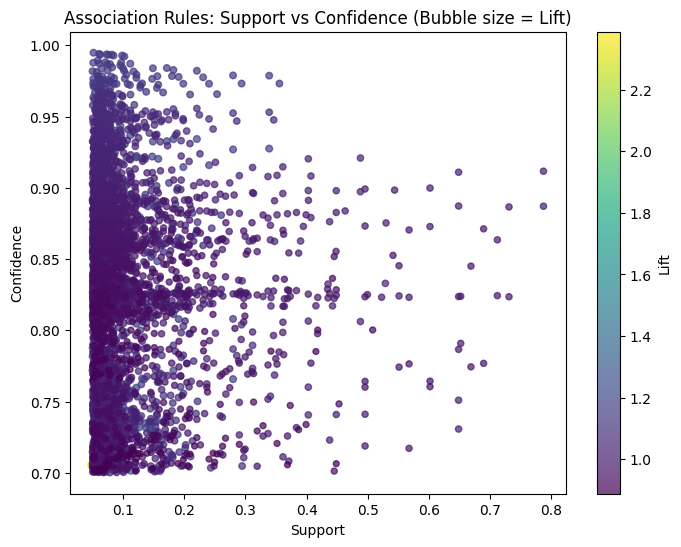

In [17]:
import matplotlib.pyplot as plt

supports = rules['support']
confidences = rules['confidence']
lifts = rules['lift']

plt.figure(figsize=(8,6))
scatter = plt.scatter(supports, confidences, c=lifts, s=lifts*20, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence (Bubble size = Lift)')

plt.savefig("mba_scatter.png", dpi=300, bbox_inches='tight')
plt.show()
